### Going to gather pokemon data from https://pokemondb.net/pokedex/all
## It will be saved in a Pandas dataframe
#### The stats, and types, and their abilities and hidden abilities. Name Origin, A boolean column on whether they're a mega or not, and trying to find the starter pokemon of each generation


In [435]:
#Importing all our neccessary libraries
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import time

## Getting the site as main_site

In [2]:
a = requests.get("https://pokemondb.net/pokedex/all")
main_site = bs(a.content)

# Going to get all the tablerows

In [3]:
table_body = main_site.select("tbody")[0]

In [4]:
table_rows = table_body.select("tr")

## Going to get the name of the pokemon in the table row

In [5]:
first_row = table_rows[0]

In [6]:
first_row.a.get_text()

'Bulbasaur'

In [7]:
first_ten_poke_names = [row.a.get_text() for row in table_rows[0:10]]

In [8]:
#first_ten_poke_names

### As you can see Charizard repeats three times, that's cause the last two are mega forms
### I'll need to write that they are a mega in there!

In [9]:
charzard = table_rows[8]

In [10]:
#On the website, there is small text under some of the pokemon
#This is the path to the small text
charzard.small.get_text()

'Mega Charizard Y'

### This is what I want to save the Charizard name as. Let's do it

In [5]:
first_ten = []
for row in table_rows[0:10]:
    """
    This will take the main pokemon name if it's not in the list already
    For example, Charizard is the main pokemon, but on the website there are seperate
    entries for Charizard's megas, so It would take the megas name
    """
    if row.a.get_text() not in first_ten:
        first_ten.append(row.a.get_text())
        
    #If it is in the list already, I will get the small text under it
    else:
        first_ten.append(row.small.get_text())

In [12]:
#first_ten

### It's working, now to use it for all of the names!

In [51]:
names = []
for row in table_rows:
    if row.a.get_text() not in names:
        names.append(row.a.get_text())
    else:
        names.append(row.a.get_text() + "(" + row.small.get_text() + ")")

In [14]:
names[8]

'Charizard(Mega Charizard Y)'

## Getting the Pokemon Number:

In [15]:
first_row.td.get_text()

'001'

In [468]:
#The pokemon numbers are given on the main data set
poke_nums = [row.td.get_text() for row in table_rows]

In [17]:
len(poke_nums)

1075

# Getting the Total of their stats:

In [18]:
int(first_row.find("td", attrs = {"class" : 'cell-total'}).get_text())

318

In [470]:
#The totals is part of the column of stats, I converted it to an int so we could do calculations with it
totals = [int(row.find("td",attrs = {'class': 'cell-total'}).get_text()) for row in table_rows]

### Getting the indivual stats, same process as the total one

In [20]:
first_row.findAll("td")[4].get_text() #HP

'45'

In [471]:
HP = [int(row.findAll("td")[4].get_text()) for row in table_rows]

In [22]:
#HP.pop(33)

In [23]:
first_row.findAll("td")[5].get_text() #Attack

'49'

In [472]:
Attack = [int(row.findAll("td")[5].get_text()) for row in table_rows]

In [25]:
#Attack.pop(33)

In [26]:
first_row.findAll("td")[6].get_text() #Defense

'49'

In [473]:
Defense = [int(row.findAll("td")[6].get_text()) for row in table_rows]

In [28]:
#Defense.pop(33)

In [29]:
first_row.findAll("td")[7].get_text() #Sp.Atk

'65'

In [474]:
Sp_Atk = [int(row.findAll("td")[7].get_text()) for row in table_rows]

In [31]:
#Sp_Atk.pop(33)

In [475]:
Sp_Def = [int(row.findAll("td")[8].get_text()) for row in table_rows]

In [33]:
#Sp_Def.pop(33)

In [476]:
Speed = [int(row.findAll("td")[9].get_text()) for row in table_rows]

In [35]:
#Speed.pop(30)

## Adding a column of True/False based on if the pokemon is Mega

In [59]:
#Going to take advantage of numpy's speed and create an array of bools, of whether the pokemon
#is a mega or not
np_names = np.array(names)

In [478]:
Mega = np.char.count(np_names,'Mega ') == 1

In [61]:
len(Mega)

1190

# Getting the First type of the pokemon

In [39]:
first_row.findAll('a', attrs = {"class" : "type-icon"})[0].get_text()

'Grass'

In [63]:
#Looping over each row and getting the text in the type-icon
Type_One = [row.findAll('a', attrs = {"class" : "type-icon"})[0].get_text()
               for row in table_rows]

In [62]:
len(Attack)

1190

# Getting the Second type of the Pokemon

In [64]:
Type_Two = []
"""
This is the same process, but some pokemon do not have a second type, so the length of 
their <a class = "type-icon"> is only 1, which means I can only index 0. To combat this, I used 
a try except to call the index
"""
for row in table_rows:
    try:
        Type_Two.append(row.findAll('a', attrs = {"class" : 'type-icon'})[1].get_text())
    except IndexError:
        Type_Two.append("None")

## Going to get the pokemon species

In [65]:
#I will need this to go to each pokemon's personal information page and get their species
main_link = "https://pokemondb.net"

In [466]:
species = []
"""
The a["href"] is the link to the pokemon's personal information. By concatinating it with the
main link, we can access the pokemon's informatio, which will provide more data on the specific 
pokemon, the data we're looking for in this case is the pokemon's species
"""
for i,rows in enumerate(table_rows):
    new_site = requests.get(main_link + table_rows[i].a['href'])
    pp = bs(new_site.content)
    a = pp.tbody
    species.append(a.findAll("td")[2].get_text())

In [224]:
bulb = main_link + table_rows[2].a['href']

<tr>
<td class="cell-num cell-fixed" data-sort-value="3"><span class="infocard-cell-img"><img alt="Mega Venusaur" class="img-fixed icon-pkmn" height="42" loading="lazy" src="https://img.pokemondb.net/sprites/sword-shield/icon/venusaur-mega.png" width="56"/></span><span class="infocard-cell-data">003</span></td> <td class="cell-name"><a class="ent-name" href="/pokedex/venusaur" title="View Pokedex for #003 Venusaur">Venusaur</a><br/> <small class="text-muted">Mega Venusaur</small></td><td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/> <a class="type-icon type-poison" href="/type/poison">Poison</a></td>
<td class="cell-num cell-total">625</td>
<td class="cell-num">80</td>
<td class="cell-num">100</td>
<td class="cell-num">123</td>
<td class="cell-num">122</td>
<td class="cell-num">120</td>
<td class="cell-num">80</td>
</tr>

In [225]:
bulb_site = requests.get(bulb)

In [226]:
b_site = bs(bulb_site.content)

In [44]:
egg_group_one = []

for i, rows in enumerate(table_rows):
    new_site = requests.get(main_link + table_rows[i].a['href'])
    pp = bs(new_site.content)
    first_egg = pp.findAll("table", attrs = {"class" : "vitals-table"})[2].find("td").get_text().split(",")[0]
    egg_group_one.append(first_egg)

In [45]:
egg_group_two = []

for i, rows in enumerate(table_rows):
    new_site = requests.get(main_link + table_rows[i].a['href'])
    pp = bs(new_site.content)
    try:
        second_egg =pp.findAll("td")[12].findAll("a")[1].get_text()    
        egg_group_two.append(second_egg)
    except IndexError:
        egg_group_two.append("None")

In [50]:
list(zip(egg_group_one, egg_group_two))[0]

('Grass', 'Monster')

## Going to get the Abilites

In [425]:
def assign_abilities(abilities):
    global first_abilities
    global second_abilities
    global hidden_abilities
    
    if len(abilities) == 3:
        first_abilities.append(abilities[0].get_text())
        second_abilities.append(abilities[1].get_text())
        hidden_abilities.append(abilities[2].get_text())
    elif len(abilities) == 2:
        first_abilities.append(abilities[0].get_text())
        second_abilities.append("None")
        hidden_abilities.append(abilities[1].get_text())
    elif len(abilities) == 1:
        first_abilities.append(abilities[0].get_text())
        second_abilities.append("None")
        hidden_abilities.append("None")
    #Partner Pikachu and Eevee again, man I hate them    
    else:
        first_abilities.append("None")
        second_abilities.append("None")
        hidden_abilities.append("None")

In [462]:
#This will hold the first ability
first_abilities = []
#This will hold the second ability
second_abilities = []
#This will hold the hidden ability
hidden_abilities = []
#All names with duplicates
dnames = [row.a.get_text() for row in table_rows]

counted_names = Counter(dnames)

def create_abilities(tbr, index):
    if index == len(tbr):
        return None
    cur_link = main_link + tbr[index].a['href']
    cur_site = requests.get(cur_link)
    cur = bs(cur_site.content)
    sv_tabs = cur.find("div", attrs = {"class" : "sv-tabs-panel-list"})
    vers = sv_tabs.findAll("div", attrs = {"class" : "sv-tabs-panel"}, recursive = False)
    for var in vers:
        try:
            abilities = var.find("table", attrs = {"class" : "vitals-table"}).findAll("tr")[5].findAll("a")
            assign_abilities(abilities)
        except AttributeError:
            first_abilities.append("None")
            second_abilities.append("None")
            hidden_abilities.append("None")      
    return create_abilities(tbr, index + counted_names[dnames[index]])

create_abilities(table_rows, 0)

In [463]:
len(first_abilities)

1190

In [464]:
len(second_abilities)

1190

In [465]:
len(hidden_abilities)

1190

### What generation was this pokemon introduced in

In [479]:
#Going to have to make all mega generation 6
#Going to have to make all alolan generation 7
#Going to have to make all Galarian generation 8
generation = []
for i,row in enumerate(table_rows):
    try:
        if "Mega" in row.small.get_text():
            generation.append("Generation 6")
        elif "Alolan" in row.small.get_text():
            generation.append("Generation 7")
        elif "Galarian" in row.small.get_text():
            generation.append("Generation 8")
        #This is for the Partner Pikachu and Eevee, which, once again, are their own special cases
        #Why do they have their own pokemon entry!
        else:
            new_site = requests.get(main_link + table_rows[i].a['href'])
            pp = bs(new_site.content)
            generation.append(pp.find("abbr").get_text())
    except:
        new_site = requests.get(main_link + table_rows[i].a['href'])
        pp = bs(new_site.content)
        generation.append(pp.find("abbr").get_text())

In [50]:
names[33]

'Pikachu(Partner Pikachu)'

In [51]:
#second_abilities

In [52]:
len(first_abilities)

1074

# Going to classify pokemon as legendary, sub legendary, or Mythical

## There is a website that has these classifications, so we're going to scrape it
### Totally uncessary, but its a review

In [481]:
legend_req = requests.get("https://www.serebii.net/pokemon/legendary.shtml")
legend_site = bs(legend_req.content)

In [482]:
tables = legend_site.findAll('table', attrs = {"class" : "trainer"})

In [483]:
legends = defaultdict(list)

In [484]:
sub = tables[0]
for name in sub.findAll("td", attrs = {"align" : "center"}):
    cur = name.find("a")
    try:
        # I have to put the type/ instead of type because there's actually a pokemon called type null!
        if "type/" not in cur['href'] and "ability" not in cur['href']:
            legends[tables[0].td.get_text()].append(cur.get_text())
    except:
        pass

In [485]:
sub = tables[1]
for name in sub.findAll("td", attrs = {"align" : "center"}):
    cur = name.find("a")
    try:
        # I have to put the type/ instead of type because there's actually a pokemon called type null!
        if "type/" not in cur['href'] and "ability" not in cur['href']:
            legends[tables[1].td.get_text()].append(cur.get_text())
    except:
        pass

In [486]:
sub = tables[2]
for name in sub.findAll("td", attrs = {"align" : "center"}):
    cur = name.find("a")
    try:
        # I have to put the type/ instead of type because there's actually a pokemon called type null!
        if "type/" not in cur['href'] and "ability" not in cur['href']:
            legends[tables[2].td.get_text()].append(cur.get_text())
    except:
        pass

In [487]:
legendary = legends['Legendary Pokémon']

In [488]:
mythicals = legends["Mythical Pokémon"]

In [489]:
sub_legendary = legends["Sub-Legendary Pokémon"]

In [490]:
is_legendary = []

In [491]:
is_mythical = []

In [492]:
is_sub = []

In [493]:
for row in table_rows:
    is_legendary.append(row.a.get_text() in legendary)
    is_mythical.append(row.a.get_text() in mythicals)
    is_sub.append(row.a.get_text() in sub_legendary)

## Turning it into a pandas dataframe

In [494]:
info = { 
            'Names' : names,
            'Pokemon Number' : poke_nums,
            'Stat Total' : totals,
            'HP': HP,
            'Attack' : Attack,
            'Defense' : Defense,
            'Sp.Atk' : Sp_Atk,
            'Sp.Def' : Sp_Def,
            'Speed' : Speed,
            'Mega'  : Mega,
            'First Type' : Type_One,
            'Second Type' : Type_Two,
            'Species' : species,
            'First Ability' : first_abilities,
            'Second Ability' : second_abilities,
            'Hidden Ability' : hidden_abilities,
            'Generation' : generation,
            'Egg Group 1': egg_group_one,
            'Egg Group 2': egg_group_two,
            "Is Sub Legendary" : is_sub,
            "Is Legendary" : is_legendary,
            "Is Mythical" : is_mythical,
            }

In [495]:
poke_info = pd.DataFrame.from_dict(info)
#Make the line below inplace = True after gathering more data
poke_info.set_index('Names', inplace = True) 

In [ ]:
test = poke_info

In [ ]:
#first_100 = glance.iloc[:100, :]

In [ ]:
(336.25 + 395.5 + 573.75) / 3

435.1666666666667

In [496]:
poke_info

,Pokemon Number,Stat Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Mega,First Type,...,Species,First Ability,Second Ability,Hidden Ability,Generation,Egg Group 1,Egg Group 2,Is Sub Legendary,Is Legendary,Is Mythical
Names,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,001,318,45,49,49,65,65,45,False,Grass,...,Seed Pokémon,Overgrow,None,Chlorophyll,Generation 1,Grass,Monster,False,False,False
Ivysaur,002,405,60,62,63,80,80,60,False,Grass,...,Seed Pokémon,Overgrow,None,Chlorophyll,Generation 1,Grass,Monster,False,False,False
Venusaur,003,525,80,82,83,100,100,80,False,Grass,...,Seed Pokémon,Overgrow,None,Chlorophyll,Generation 1,Grass,Monster,False,False,False
Venusaur(Mega Venusaur),003,625,80,100,123,122,120,80,True,Grass,...,Seed Pokémon,Thick Fat,None,None,Generation 6,Grass,Monster,False,False,False
Charmander,004,309,39,52,43,60,50,65,False,Fire,...,Lizard Pokémon,Blaze,None,Solar Power,Generation 1,Dragon,Monster,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chi-Yu,1004,570,55,80,80,135,120,100,False,Dark,...,Ruinous Pokémon,Beads of Ruin,None,None,Generation 9,Undiscovered,None,True,False,False
Roaring Moon,1005,590,105,139,71,55,101,119,False,Dragon,...,Paradox Pokémon,Protosynthesis,None,None,Generation 9,Undiscovered,None,False,False,False
Iron Valiant,1006,590,74,130,90,120,60,116,False,Fairy,...,Paradox Pokémon,Quark Drive,None,None,Generation 9,Undiscovered,None,False,False,False


In [ ]:
"""
The values are all means, so the value in [Bug, Generation 1] is this mean for all the generation 1 pokemon
The [Bug, All] column is the mean for all the the Bug pokemon
"""
gen_1

#### Eventually we are going to simulate battles with this data. The pokemon with a faster speed would go first and do damage of Sp.Atk or Attack (Highest one). It would do damage based on it's first type, or second type (let user decide). And the defending pokemon would guard (Keep type effectiveness in mind). The damage done will be Hp - (Attack - (Defense * 3)). 
#### Might add some balance stuff, so legendaries or megas go last, or if the stat total is way higher (twice or 1.5x) then it would go last.

In [500]:
data = poke_info.groupby("First Type").count()

In [501]:
types = [Type for Type, x in data.iterrows()]

In [502]:
amounts = [amount for amount in data['HP']]

In [ ]:
len(types)

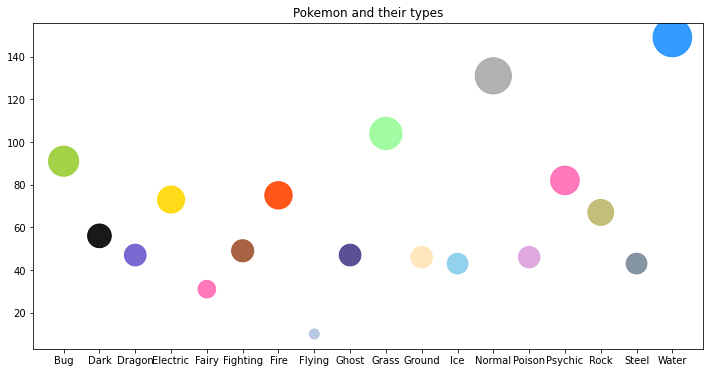

In [549]:
plt.figure(figsize = (12,6))
colors = ["yellowgreen","black","slateblue", "gold", "hotpink", "sienna", "orangered", "lightsteelblue", 
          "darkslateblue", "palegreen", "moccasin", "skyblue", "darkgrey", "plum", "hotpink",
          "darkkhaki", "lightslategrey", "dodgerblue"]


plt.scatter(types, amounts, s = np.array(amounts) * 10, alpha = .9, c = colors)
plt.title("Pokemon and their types")

plt.show()

In [ ]:
#data_300 = glance.groupby("First Type").count()

In [ ]:
types_300 = [Type for Type, x in data_300.iterrows()]
amounts_300 = [amount for amount in data_300['HP']]

In [ ]:
len(types_300)

In [ ]:
plt.clf()

In [ ]:
plt.figure(figsize = (14,6))
colors_300 = ["olive","black", "darkgoldenrod" , "yellow", "fuchsia","sienna", "red", "indigo", "limegreen", "peru", 
          "cyan", "lightgrey", "mediumorchid", "deeppink", "tan", "slategray", "dodgerblue" ]

plt.scatter(types_300, amounts_300, s = np.array(amounts_300) * 600, alpha = .9, c = colors_300)
plt.title("First 300 pokemon and their types")
plt.show()

In [ ]:
#glance[glance["Is Sub Legendary"] == True]

In [550]:
poke_info[poke_info["Mega"] == True]

,Pokemon Number,Stat Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Mega,First Type,...,Species,First Ability,Second Ability,Hidden Ability,Generation,Egg Group 1,Egg Group 2,Is Sub Legendary,Is Legendary,Is Mythical
Names,,,,,,,,,,,,,,,,,,,,,
Venusaur(Mega Venusaur),003,625,80,100,123,122,120,80,True,Grass,...,Seed Pokémon,Thick Fat,None,None,Generation 6,Grass,Monster,False,False,False
Charizard(Mega Charizard X),006,634,78,130,111,130,85,100,True,Fire,...,Flame Pokémon,Tough Claws,None,None,Generation 6,Dragon,Monster,False,False,False
Charizard(Mega Charizard Y),006,634,78,104,78,159,115,100,True,Fire,...,Flame Pokémon,Drought,None,None,Generation 6,Dragon,Monster,False,False,False
Blastoise(Mega Blastoise),009,630,79,103,120,135,115,78,True,Water,...,Shellfish Pokémon,Mega Launcher,None,None,Generation 6,Monster,Water 1,False,False,False
Beedrill(Mega Beedrill),015,495,65,150,40,15,80,145,True,Bug,...,Poison Bee Pokémon,Adaptability,None,None,Generation 6,Bug,None,False,False,False
Pidgeot(Mega Pidgeot),018,579,83,80,80,135,80,121,True,Normal,...,Bird Pokémon,No Guard,None,None,Generation 6,Flying,None,False,False,False
Alakazam(Mega Alakazam),065,600,55,50,65,175,105,150,True,Psychic,...,Psi Pokémon,Trace,None,None,Generation 6,Human-Like,None,False,False,False
Slowbro(Mega Slowbro),080,590,95,75,180,130,80,30,True,Water,...,Hermit Crab Pokémon,Shell Armor,None,None,Generation 6,Monster,Water 1,False,False,False
Gengar(Mega Gengar),094,600,60,65,80,170,95,130,True,Ghost,...,Shadow Pokémon,Shadow Tag,None,None,Generation 6,Amorphous,None,False,False,False


In [551]:
poke_info.to_json("Pokemon Data-Updated.json")